In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             mean_squared_error, r2_score)

# Функция для загрузки файла вручную
def manual_upload(file_name):
    print(f"Файл {file_name} не найден. Пожалуйста, загрузите файл вручную.")
    uploaded = files.upload()
    if file_name in uploaded:
        print(f"Файл {file_name} успешно загружен.")
        return file_name
    else:
        raise FileNotFoundError(f"Файл {file_name} не был загружен.")


In [2]:
# Пути к датасетам
CLASSIFICATION_DATA_PATH = "diabetes_data_upload.csv"
REGRESSION_DATA_PATH = "laptop_price_data.csv"

# Загружаем датасет для классификации (раннее выявление диабета)
if os.path.exists(CLASSIFICATION_DATA_PATH):
    df_clf = pd.read_csv(CLASSIFICATION_DATA_PATH)
else:
    CLASSIFICATION_DATA_PATH = manual_upload("diabetes_data_upload.csv")
    df_clf = pd.read_csv(CLASSIFICATION_DATA_PATH)

print("Форма датасета (классификация):", df_clf.shape)
print(df_clf.head())

# Загружаем датасет для регрессии (цены ноутбуков)
if os.path.exists(REGRESSION_DATA_PATH):
    df_reg = pd.read_csv(REGRESSION_DATA_PATH)
else:
    REGRESSION_DATA_PATH = manual_upload("laptop_price_data.csv")
    df_reg = pd.read_csv(REGRESSION_DATA_PATH)

print("\nФорма датасета (регрессия):", df_reg.shape)
print(df_reg.head())

# (Опционально) Посмотрим общую информацию:
print("\nИнформация о датасете классификации:")
print(df_clf.info())

print("\nИнформация о датасете регрессии:")
print(df_reg.info())


Файл diabetes_data_upload.csv не найден. Пожалуйста, загрузите файл вручную.


Saving diabetes_data_upload.csv to diabetes_data_upload.csv
Файл diabetes_data_upload.csv успешно загружен.
Форма датасета (классификация): (520, 17)
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No            

Saving laptop_price_data.csv to laptop_price_data.csv
Файл laptop_price_data.csv успешно загружен.

Форма датасета (регрессия): (823, 19)
    brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0    ASUS           Intel        Core i3            10th   4 GB     DDR4   
1  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3    ASUS           Intel        Core i5            10th   8 GB     DDR4   
4    ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   

      ssd      hdd       os  os_bit graphic_card_gb  weight     warranty  \
0    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
1    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
2    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
3  512 GB     0 GB  Windows  32-bit            2 GB  Casual  No warranty   
4    0 GB   512 GB  Windo

Пункт 2 ЛР№1 — Создание бейзлайна (Random Forest)

=== Бейзлайн (RandomForestClassifier) ===
Accuracy: 0.9903846153846154
Confusion Matrix:
[[33  0]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



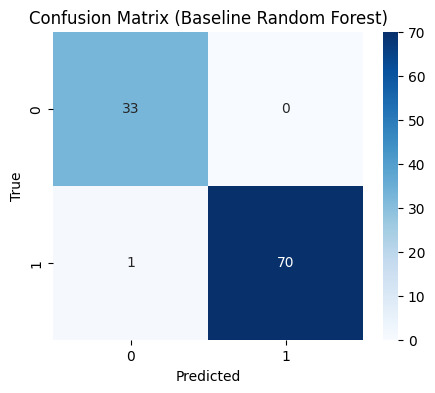


=== Бейзлайн (RandomForestRegressor) ===
MSE: 697802117.3823723
R^2: 0.6419336852597662


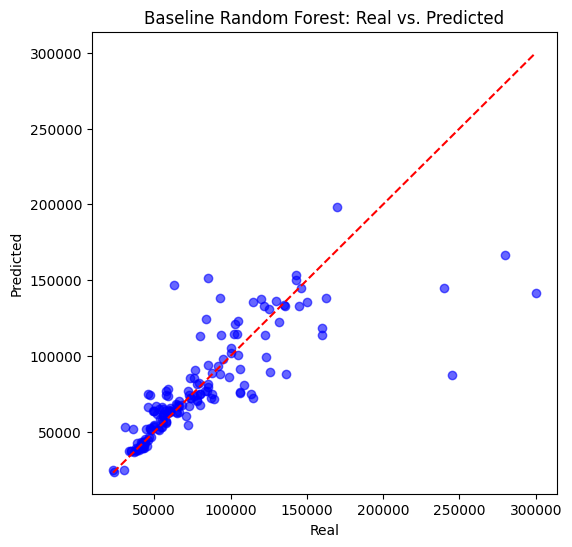

In [3]:
# ------------- Классификация -------------
# Определяем, где целевая колонка:
target_col_clf = 'class'

X_clf = df_clf.drop(columns=[target_col_clf])
y_clf = df_clf[target_col_clf]

# Кодируем категориальные признаки — LabelEncoder
cat_cols_clf = X_clf.select_dtypes(include=['object']).columns
for col in cat_cols_clf:
    le = LabelEncoder()
    X_clf[col] = le.fit_transform(X_clf[col])

# Если y_clf тоже строковый, то кодируем и его
if y_clf.dtype == 'object':
    le_y = LabelEncoder()
    y_clf = le_y.fit_transform(y_clf)

# Разделяем на train/test
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

# Обучаем "бейзлайн" — RandomForestClassifier
rfc_base = RandomForestClassifier(random_state=42)
rfc_base.fit(X_train_c, y_train_c)

# Предсказания и метрики
y_pred_c_base = rfc_base.predict(X_test_c)
acc_base = accuracy_score(y_test_c, y_pred_c_base)
print("=== Бейзлайн (RandomForestClassifier) ===")
print("Accuracy:", acc_base)
print("Confusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_c_base))
print("Classification Report:")
print(classification_report(y_test_c, y_pred_c_base))

# Heatmap confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c_base), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Baseline Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------- Регрессия -------------
target_col_reg = 'Price'
X_reg = df_reg.drop(columns=[target_col_reg])
y_reg = df_reg[target_col_reg]

# Кодируем категориальные признаки — LabelEncoder
cat_cols_reg = X_reg.select_dtypes(include=['object']).columns
for col in cat_cols_reg:
    le = LabelEncoder()
    X_reg[col] = le.fit_transform(X_reg[col])

# Разделяем
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Обучаем бейзлайн — RandomForestRegressor
rfr_base = RandomForestRegressor(random_state=42)
rfr_base.fit(X_train_r, y_train_r)

# Предсказания и метрики
y_pred_r_base = rfr_base.predict(X_test_r)
mse_base = mean_squared_error(y_test_r, y_pred_r_base)
r2_base = r2_score(y_test_r, y_pred_r_base)
print("\n=== Бейзлайн (RandomForestRegressor) ===")
print("MSE:", mse_base)
print("R^2:", r2_base)

# Визуализация: scatter "Real vs. Predicted"
plt.figure(figsize=(6,6))
plt.scatter(y_test_r, y_pred_r_base, color='blue', alpha=0.6)
plt.plot([y_test_r.min(), y_test_r.max()],
         [y_test_r.min(), y_test_r.max()],
         color='red', linestyle='--')
plt.title("Baseline Random Forest: Real vs. Predicted")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()


Пункт 3 ЛР№1 — Улучшение бейзлайна (подбор гиперпараметров)

Лучшие параметры (RandomForestClassifier): {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 50}
Лучшая метрика на CV: 0.968772807840684

=== Улучшенный RandomForest (Classification) ===
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        71

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104


Сравнение: Бейзлайн ACC = 0.990 vs Улучшенный ACC = 1.000


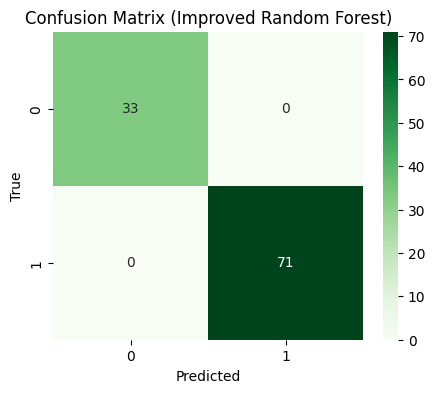


Лучшие параметры (RandomForestRegressor): {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}
Лучшая метрика на CV (R^2): 0.7378824843325527

=== Улучшенный RandomForest (Regression) ===
MSE: 704294597.1195089
R^2: 0.6386021701567126

Сравнение MSE: Бейзлайн = 697802117.382 vs Улучшенный = 704294597.120
Сравнение R^2: Бейзлайн = 0.642 vs Улучшенный = 0.639


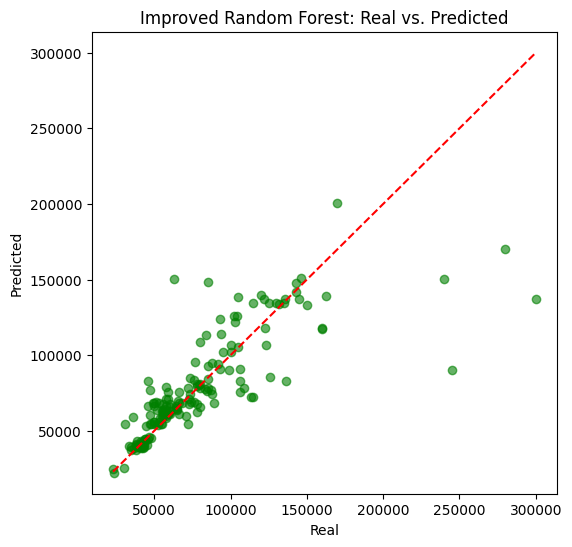

In [4]:
# ------------- Классификация -------------

# Пример поиска по сетке: n_estimators, max_depth и т.д.
param_grid_clf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_clf,
    cv=3,
    n_jobs=-1
)
grid_search_clf.fit(X_train_c, y_train_c)

print("Лучшие параметры (RandomForestClassifier):", grid_search_clf.best_params_)
print("Лучшая метрика на CV:", grid_search_clf.best_score_)

# Обучаем модель с лучшими параметрами
rfc_improved = RandomForestClassifier(
    random_state=42,
    **grid_search_clf.best_params_
)
rfc_improved.fit(X_train_c, y_train_c)

y_pred_c_improved = rfc_improved.predict(X_test_c)
acc_improved = accuracy_score(y_test_c, y_pred_c_improved)
print("\n=== Улучшенный RandomForest (Classification) ===")
print("Accuracy:", acc_improved)
print("Classification Report:")
print(classification_report(y_test_c, y_pred_c_improved))

print(f"\nСравнение: Бейзлайн ACC = {acc_base:.3f} vs Улучшенный ACC = {acc_improved:.3f}")

# Confusion Matrix (heatmap)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c_improved), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Improved Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------- Регрессия -------------

param_grid_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_reg = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_reg,
    cv=3,
    n_jobs=-1
)
grid_search_reg.fit(X_train_r, y_train_r)

print("\nЛучшие параметры (RandomForestRegressor):", grid_search_reg.best_params_)
print("Лучшая метрика на CV (R^2):", grid_search_reg.best_score_)

rfr_improved = RandomForestRegressor(
    random_state=42,
    **grid_search_reg.best_params_
)
rfr_improved.fit(X_train_r, y_train_r)

y_pred_r_improved = rfr_improved.predict(X_test_r)
mse_improved = mean_squared_error(y_test_r, y_pred_r_improved)
r2_improved = r2_score(y_test_r, y_pred_r_improved)

print("\n=== Улучшенный RandomForest (Regression) ===")
print("MSE:", mse_improved)
print("R^2:", r2_improved)
print(f"\nСравнение MSE: Бейзлайн = {mse_base:.3f} vs Улучшенный = {mse_improved:.3f}")
print(f"Сравнение R^2: Бейзлайн = {r2_base:.3f} vs Улучшенный = {r2_improved:.3f}")

# Scatter "Real vs. Predicted"
plt.figure(figsize=(6,6))
plt.scatter(y_test_r, y_pred_r_improved, color='green', alpha=0.6)
plt.plot([y_test_r.min(), y_test_r.max()],
         [y_test_r.min(), y_test_r.max()],
         color='red', linestyle='--')
plt.title("Improved Random Forest: Real vs. Predicted")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


=== Самописная модель (MyBaggingClassifier) ===
Accuracy: 0.9615384615384616
Confusion Matrix:
[[31  2]
 [ 2 69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.97      0.97      0.97        71

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



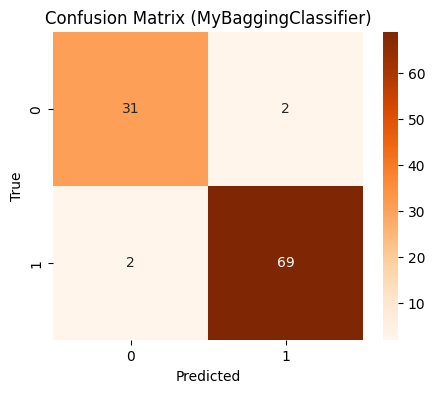

In [5]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

class MyBaggingClassifier:
    def __init__(self, n_estimators=5, max_depth=None, random_state=42):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.subsets = []
        np.random.seed(self.random_state)

    def fit(self, X, y):
        if not isinstance(X, (np.ndarray, pd.DataFrame)):
            X = np.array(X)
        if not isinstance(y, (np.ndarray, pd.Series)):
            y = np.array(y)

        self.trees = []
        self.subsets = []
        n_samples = X.shape[0]

        for i in range(self.n_estimators):
            # Bootstrap sample
            indices = np.random.choice(n_samples, size=n_samples, replace=True)

            if isinstance(X, pd.DataFrame):
                X_boot = X.iloc[indices].to_numpy()
            else:
                X_boot = X[indices]

            if isinstance(y, pd.Series):
                y_boot = y.iloc[indices].to_numpy()
            else:
                y_boot = y[indices]

            # Создаём дерево
            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state + i)
            tree.fit(X_boot, y_boot)

            self.trees.append(tree)
            self.subsets.append(indices)

    def predict(self, X):
        # Прогноз каждого дерева
        preds = []
        for tree in self.trees:
            preds.append(tree.predict(X))

        # preds будет список длины n_estimators, каждый элемент — массив предсказаний
        preds = np.array(preds)  # shape (n_estimators, n_samples)

        # Берём моду по столбцам
        final_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=preds)
        return final_pred

# Пример использования написанного самостоятельно BaggingClassifier
my_bagging = MyBaggingClassifier(n_estimators=5, max_depth=None, random_state=42)
my_bagging.fit(X_train_c, y_train_c)
y_pred_my = my_bagging.predict(X_test_c)

acc_my = accuracy_score(y_test_c, y_pred_my)

print("=== Самописная модель (MyBaggingClassifier) ===")
print("Accuracy:", acc_my)
print("Confusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_my))
print("Classification Report:")
print(classification_report(y_test_c, y_pred_my))

# Визуализация confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_my), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix (MyBaggingClassifier)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
